<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/aapl_sac_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Fix Potential Library Conflicts
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [15]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [1]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [2]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [3]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [4]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0
  Attempting uninstall: numba
    Found existing installation: numba 0.61.0
    Uninstalling numba-0.61.0:
      Successfully uninstalled numba-0.61.0


In [5]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


  Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.8 MB)
Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.4 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cuml-c

In [6]:
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv


#Load Dataset for Training
df_live = yf.download("TSLA", period="720d", interval="1h")
df_live.reset_index(inplace=True)
df = df_live.copy()

#Fix MultiIndex Issues (if applicable)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

#Remove Named Index (Fixes KeyError Issues)
df.reset_index(drop=True, inplace=True)


#Feature Engineering (Additional Indicators)
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())

    df.dropna(inplace=True)
    return df


#Apply Technical Indicators
df = compute_technical_indicators(df)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
#Enable GPU Acceleration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


#Custom Continuous Trading Environment
class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        # Convert continuous action (-1 to 1) to a discrete action (BUY, SELL, HOLD)
        if action < -0.3:
            discrete_action = 0  # SELL
        elif action > 0.3:
            discrete_action = 1  # BUY
        else:
            discrete_action = 2  # HOLD

        return super().step(discrete_action)


#Initialize the Custom Environment
frame_bound = (50, len(df))
env = ContinuousTradingEnv(df=df, frame_bound=frame_bound, window_size=10)
env = DummyVecEnv([lambda: env])


#Define Action Noise for SAC
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))


Using device: cuda


In [8]:
#Train SAC Model with Optimized Settings
sac_model = SAC(
    "MlpPolicy",
    env,
    learning_rate=0.0001,
    buffer_size=20000,  # Reduced buffer size to avoid memory overload
    batch_size=64,
    gamma=0.995,
    tau=0.005,
    gradient_steps=1,
    device=device,
)

#Train SAC Model with Reduced Timesteps for Faster Convergence
sac_model.learn(total_timesteps=300000)
sac_model.save("sac_trading_model_v2")


#Run SAC Trading Strategy
obs = env.reset()
trade_log_sac = []
buy_price = None

for i in range(len(df) - 50):
    action, _ = sac_model.predict(obs)
    action_value = action[0]

    if action_value > 0.3 and buy_price is None:
        trade_log_sac.append("BUY")
        buy_price = df['Close'].iloc[i + 50]
    elif action_value < -0.3 and buy_price is not None:
        trade_log_sac.append("SELL")
        buy_price = None
    else:
        trade_log_sac.append("HOLD")

#Verify Length Match Before Adding to DataFrame
if len(trade_log_sac) == len(df) - 50:
    df = df.iloc[50:].reset_index(drop=True)
    df["SAC_Trade_Signal"] = trade_log_sac
else:
    print(f"Length mismatch: {len(trade_log_sac)} vs {len(df) - 50}")
    df = df.iloc[50:].reset_index(drop=True)




FINAL RESULTS COMPARISON:
**Reinforcement Learning (SAC)**
SAC Final Portfolio Value: $99,932.10
SAC Cumulative Return: -0.07%
SAC Sharpe Ratio: -0.00
SAC Max Drawdown: 1.88%

**Buy & Hold Baseline**
Buy & Hold Final Portfolio Value: $102,410.59

**Best Strategy Based on Final Portfolio Value: Buy & Hold!**


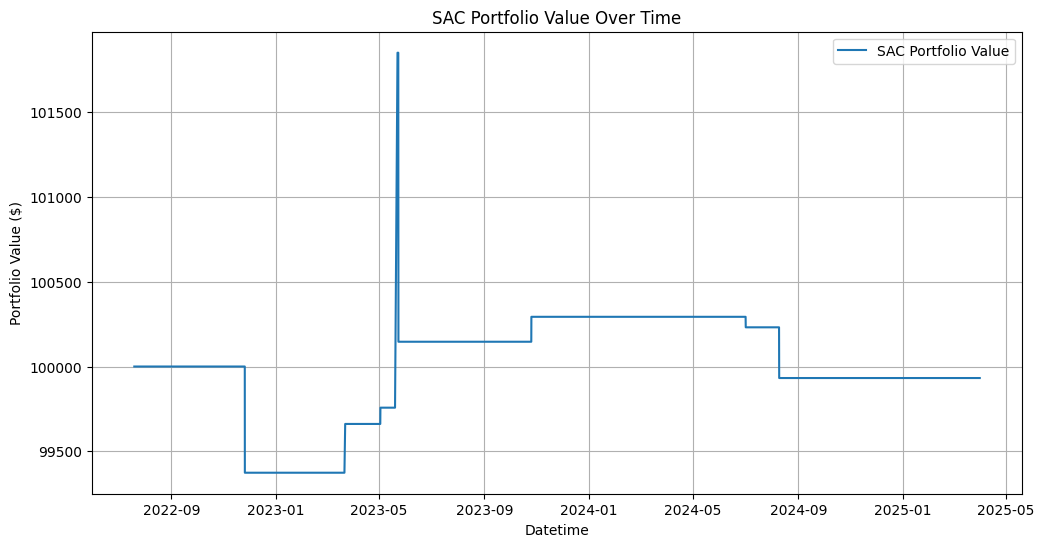

In [11]:

#Verify Length Match Before Backtesting
trade_log_sac = trade_log_sac[:len(df) - 50]

#Backtesting and Portfolio Calculation
initial_balance = 100000
balance_sac = initial_balance
position = 0
portfolio_values_sac = []

for i, trade in enumerate(trade_log_sac):
    if i + 50 >= len(df):
        break  # Prevent index out-of-bounds

    price = df['Close'].iloc[i + 50]

    if trade == "BUY" and position == 0:
        position = balance_sac / price
        balance_sac = 0
    elif trade == "SELL" and position > 0:
        balance_sac = position * price
        position = 0

    portfolio_values_sac.append(balance_sac if balance_sac > 0 else position * price)



#Compute Performance Metrics for SAC
final_balance_sac = portfolio_values_sac[-1]
final_balance_hold = (initial_balance / df['Close'].iloc[50]) * df['Close'].iloc[-1]

date_col = "Datetime" if "Datetime" in df.columns else "Date"
results_df_sac = pd.DataFrame({'Date': df['Datetime'].iloc[50:], 'Portfolio Value': portfolio_values_sac})

results_df_sac['Daily Return'] = results_df_sac['Portfolio Value'].pct_change().fillna(0)

sac_cumulative_return = ((results_df_sac['Portfolio Value'].iloc[-1] / initial_balance) - 1) * 100
sac_sharpe_ratio = (results_df_sac['Daily Return'].mean() / results_df_sac['Daily Return'].std()) * np.sqrt(252) if results_df_sac['Daily Return'].std() != 0 else 0
sac_max_drawdown = ((results_df_sac['Portfolio Value'].cummax() - results_df_sac['Portfolio Value']) / results_df_sac['Portfolio Value'].cummax()).max() * 100


#Final Results Summary
print("\nFINAL RESULTS COMPARISON:")
print("**Reinforcement Learning (SAC)**")
print(f"SAC Final Portfolio Value: ${final_balance_sac:,.2f}")
print(f"SAC Cumulative Return: {sac_cumulative_return:.2f}%")
print(f"SAC Sharpe Ratio: {sac_sharpe_ratio:.2f}")
print(f"SAC Max Drawdown: {sac_max_drawdown:.2f}%")

print("\n**Buy & Hold Baseline**")
print(f"Buy & Hold Final Portfolio Value: ${final_balance_hold:,.2f}")

#Declare Winner Based on Portfolio Performance
winner = "SAC" if final_balance_sac > final_balance_hold else "Buy & Hold"
print(f"\n**Best Strategy Based on Final Portfolio Value: {winner}!**")


#Plot Portfolio Value Over Time
plt.figure(figsize=(12, 6))
results_df_sac['Date'] = pd.to_datetime(results_df_sac['Date'])
plt.plot(results_df_sac['Date'], results_df_sac['Portfolio Value'], label='SAC Portfolio Value')
plt.xlabel('Datetime')
plt.ylabel('Portfolio Value ($)')
plt.title('SAC Portfolio Value Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Save Results with Naming Convention
def generate_filename(stock="TSLA", model="sac", version="v2", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"


def save_sac_results(stock, final_balance_sac, sac_cumulative_return, sac_sharpe_ratio, sac_max_drawdown, trade_log_sac, version="v2"):
    #Save to JSON
    results_path_json = generate_filename(stock, "sac", version, "json")
    with open(results_path_json, "w") as f:
        json.dump({
            "model_name": "SAC",
            "final_value": final_balance_sac,
            "cumulative_return": sac_cumulative_return,
            "sharpe_ratio": sac_sharpe_ratio,
            "max_drawdown": sac_max_drawdown,
            "trade_log": trade_log_sac[:10]  # Save only first 10 trades for brevity
        }, f, indent=2)

    #Save Trade Log to CSV
    results_path_csv = generate_filename(stock, "sac", version, "csv")
    pd.DataFrame(trade_log_sac, columns=["Trade Signal"]).to_csv(results_path_csv, index=False)

    print(f"SAC Portfolio results saved to: {results_path_json}")
    print(f"Trade log saved to CSV: {results_path_csv}")


#Save SAC Results
save_sac_results(
    stock="TSLA",
    final_balance_sac=final_balance_sac,
    sac_cumulative_return=sac_cumulative_return,
    sac_sharpe_ratio=sac_sharpe_ratio,
    sac_max_drawdown=sac_max_drawdown,
    trade_log_sac=trade_log_sac
)
